In [110]:
# Importaciones
import random
import requests as rq
from bs4 import BeautifulSoup
import re
import networkx as nx
import pickle

# Abro la base de datos con mis paginas almacenadas y la cargo en memoria
with open("data.pickle", "rb") as f:
     guardados = ((pickle.load(f)))

# Paginas almacenadas
print(len(guardados))

3409


In [71]:

#clases
class Nodo():
    
    # quiero que cuando lo imprima me salga el nombre del objeto (limito los caracteres oara el grafico)
    def __repr__(self) -> str:
        return '%.9s' % self.nombre
    
    #cuando se incializa un nodo se crea en el grafico, se le da un nombre, la url de su pagina de wikipedia y se le crea una lista con todos los links dentro de ella
    def __init__(self, nombre) -> None:
        self.nombre = nombre
        # acá se van a almacenar las urls internas
        self.palabras = set()
        self.parsePage(nombre)
    
    #metodo que va a fijarse si dos nodos tienen conexion, osea si uno referencia al otro (opcional a usar)
    def estaEn(self, nodo):
        if self.nombre.lower() in nodo.palabras:
            self.addEdge(nodo)
            
     
    #parsea con bs4 la pagina de wikipedia que le pases, obteniendo los hipervinculos dentro
    def parsePage(self,nombre):
                
        #el prefijo para siguientes busquedas
        prefijo_wiki = "https://es.wikipedia.org/wiki/"
        url = prefijo_wiki + nombre

        # Me fijo si esta ne mi base de datos de urls
        if self.nombre in guardados.keys():
            page = guardados[self.nombre]
        else:
            page = rq.get(url)
            guardados[self.nombre] = page

        #la parseo en un objeto
        soup = BeautifulSoup(page.content, "html.parser")
        
        #armo una lista con los terminos que yo quiero, en este caso todos los links que refertencian a otra pagina dentro de la wikipedia
        links = soup.find_all('a', attrs={"href": re.compile("^/wiki/")})

        #selecciono a partir de que links me va a interesar revisar (es arbitrario para reducir los link que no me importan, como los de discusion e idiomas del articulo)
        limite_inferior = 30

        ## LIMPIEZA DE DATOS ##
        
        #obtengo el texto y lo cargo en el set
        for i in links[limite_inferior:]:
            self.palabras.add(i.get_text().lower().replace(" ","_")) # Hay que hacer que no sea caps sensitive y eliminar los espacios para poder usarlos en urls
        
        #remuevo los resultados vacios, el try hace que el remove no me explote el programa
        try:
            self.palabras.remove('')
        except KeyError:
            pass
        
        # remuevo estos links que no me interesan
        try:
            self.palabras.remove("limitación_de_responsabilidad")
        except KeyError:
            pass
        
        # el about usa tampoco me interesa
        try:
            self.palabras.remove("acerca_de_wikipedia")
        except KeyError:
            pass
        
        # filtro aquellos resultados que empiezan con wikipedia y los del isbn, uso regex
        for i in list(self.palabras):
            if re.match(r"^wikipedia", i) or re.match(r"^isbn", i):
                self.palabras.remove(i)
        


                
    

        



primates
callicebus_barbarabrownae
gbif
msw
issn
platirrino
e._geoffroy
chinchillas
1840
médico


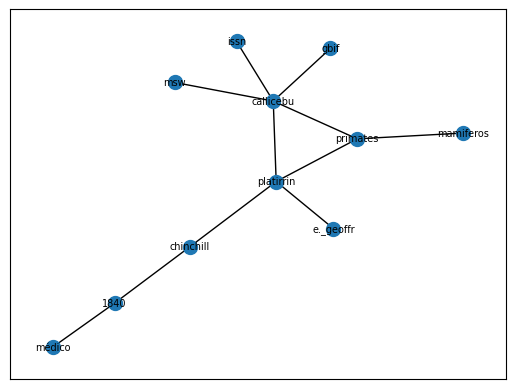

In [109]:
######### Ejemplo con encadenamiento ###############

#lista que va a tener todos los nodos del grafico
nodos = set()
# lista que contiene los vertices
vertices = list()



#nodo central
nodo_maestro = Nodo("mamiferos")
# lo agrego a la lista con todos los nodos
nodos.add(nodo_maestro)


# obtengo un nodo aleatorio
nodo = Nodo(list(nodo_maestro.palabras)[random.randrange(0,len(nodo_maestro.palabras))])
# nodo que me va a servir para saber que nodo referencia a cual
nodo_anterior = nodo_maestro
# voy a ejecutar 50 "queries"
for i in range(50):
    # lo agrego a la lista d enodos
    nodos.add(nodo)
    print(nodo.nombre)
    # agrego el link entre el ndodo buscado y el nodo de donde salió
    vertices.append((nodo_anterior, nodo)) #REVISAR ESTO, pq no funciona sin?
    # si no esta vacio me va a servir para encontrar nuevos nodos
    if (len(nodo.palabras)>0):
        # checkeo con que otros nodos hay relacion (osea que esta en su lista de palabras)
        for i in nodos:
            if nodo.nombre in i.palabras and i.nombre != nodo.nombre: # no me interesa que se vincule consigo mismo
                vertices.append((nodo,i))
        # lo voy a usar para buscar mas nodos, por lo tanto lo tengo que guardar para luego vincularlo
        nodo_anterior = nodo
        # consigo un nuevo nodo
        nodo = Nodo(list(nodo_anterior.palabras)[random.randrange(0,len(nodo_anterior.palabras))]) # cambiar nodo_maestro por nodo
    else:
        # si elnodo esta vacio uso el anterior y no me intrrumpe la ejecucion del programa
        nodo =  Nodo(random.choice(list(nodo_anterior.palabras)))
    



    
# creo el grafo
grafo = nx.Graph()
grafo.add_nodes_from(list(nodos))
grafo.add_edges_from(vertices)
nx.draw_networkx(grafo, with_labels=True, node_size=100, font_size = 7)

# para actualizar la lista de paginas (DEJAR COMENTADO)
# with open("data.pickle", "wb") as f:
#     pickle.dump(guardados,f)

clima_de_
campeonat
constituc
elipse
gauchos
mango
reforma_d
japonesa
arturo_il
armada_de
san_migue
té
producto_
policía
balanza_c
jorge_new
pingüinos
polo_sur
viajes_ex
carnaval_
reino_de_
bióloga
cementero
puerto_ma
capital
instrucci
teatro_ge
capital_f
aguará_gu
premios_n
peruana
2001
regiones_
siderúrgi
pueblos_o
premio_mi
hipólito_
gendarmer
occidenta
eslovaco
telecomun
literatur
equitació
autopista
alfabetiz
tornado
978950941
maracuyá
bid
inta
1914
polaca
danza_clá
afroargen
prosopis_
campeonat
llama
millas_ná
jorge_lui
978-987-4
humedales
unesco
homero_ma
carne_de_
idioma_es
adolfo_bi
cuenca_de
tastil
convenció
mapudungu
campeonat
ofidios
geopolíti
hortícola
pizza_arg
crisis_de
corte_sup
colihue
organizac
fernando_
himno_nac
centros_c
uruguaya
griego
geografía
las_leñas
convenció
castellan
boliviana
copa_amér
africanos
quebrada_
25_de_may
campeonat
brics
tonocoté
araucaria
orcas
blancos
montevide


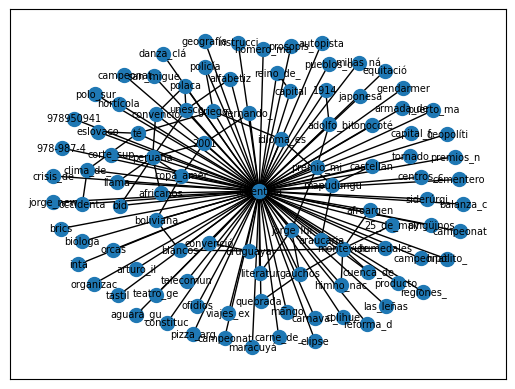

In [103]:
####### EJEMPLO ramificacion CENTRAL ##########

# Mi centro del grafo, de acá vana salir todas las paginas
nodo_central = Nodo("argentina")

# Nodos
n1 = list()

# veritces
v = list()

# ramas
for i in range(100):
    nodo = Nodo(random.choice(list(nodo_central.palabras)))
    print(nodo)
    # checkeo las conexiones con otros nodos
    for j in n1:
        if nodo.nombre in j.palabras:
            v.append((nodo, j))
    # lo agrego a los nodos a dibujar
    n1.append(nodo)



# los uno todos con el nodo central, que es de donde salen
for nodo in n1:
    v.append((nodo, nodo_central))
    
grafo = nx.Graph()
grafo.add_nodes_from(list(n1))
grafo.add_edges_from(v)
nx.draw_networkx(grafo, with_labels=True, node_size=100, font_size = 7)


# para actualizar la lista de paginas (DEJAR COMENTADO)
# para actualizar la lista de paginas
# with open("data.pickle", "wb") as f:
#     pickle.dump(guardados,f)


se me jijean los jijos
